#LINEAR REGRESSION

Name: Priyasmita Das <BR>
Roll: 2206284 <br>
Section: IT-06


###1. Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the data
X = pd.read_csv('linearX.csv').values.flatten()
Y = pd.read_csv('linearY.csv').values.flatten()

In [19]:
# 2. Normalize X
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

In [20]:
# 3. Initialize parameters
theta0 = 0  # intercept
theta1 = 0  # slope
learning_rate = 0.5
iterations = 1000
m = len(X_norm)
costs = []

In [21]:
# Cost function (Mean Squared Error divided by 2)
def compute_cost(X, Y, theta0, theta1):
    predictions = theta0 + theta1 * X
    errors = predictions - Y
    cost = (1/(2*m)) * np.sum(errors ** 2)
    return cost

In [22]:
# 4. Gradient Descent
for it in range(iterations):
    predictions = theta0 + theta1 * X_norm
    errors = predictions - Y

    # Gradients
    d_theta0 = (1/m) * np.sum(errors)
    d_theta1 = (1/m) * np.sum(errors * X_norm)

    # Update rules
    theta0 = theta0 - learning_rate * d_theta0
    theta1 = theta1 - learning_rate * d_theta1

    # Save cost
    cost = compute_cost(X_norm, Y, theta0, theta1)
    costs.append(cost)

    # Convergence criteria: if change in cost is very small
    if it > 0 and abs(costs[-2] - costs[-1]) < 1e-8:
        print(f"Converged at iteration {it}")
        break

print(f"Final theta0 (intercept): {theta0}")
print(f"Final theta1 (slope): {theta1}")
print(f"Final cost: {costs[-1]}")

Converged at iteration 13
Final theta0 (intercept): 0.9965733116935961
Final theta1 (slope): 0.0013578568865934163
Final cost: 1.183984276869571e-06


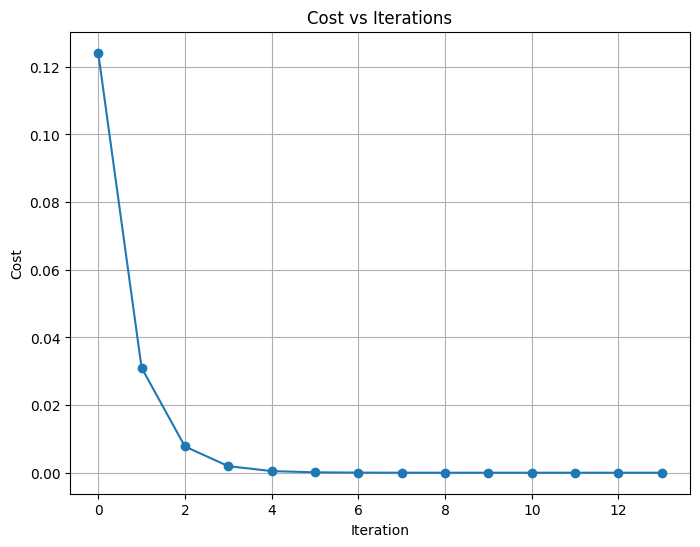

In [23]:
# 5. Plot cost vs iteration
plt.figure(figsize=(8,6))
plt.plot(range(len(costs)), costs, marker='o')
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()
plt.show()

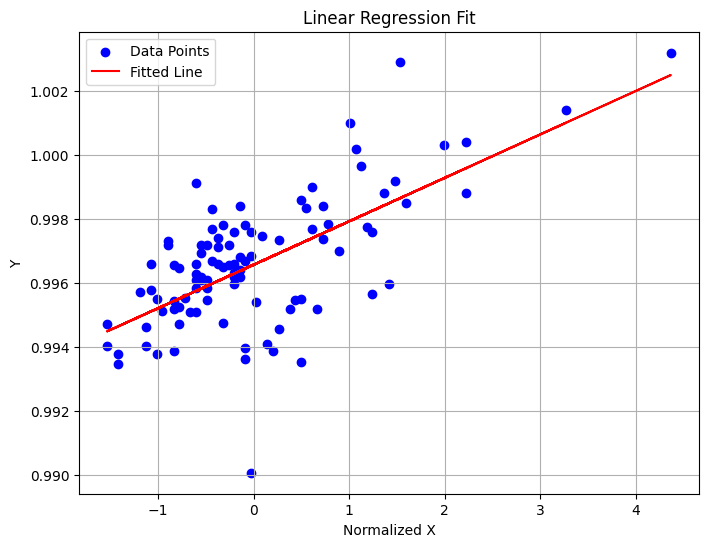

In [24]:
# 6. Plot dataset and fitted line
plt.figure(figsize=(8,6))
plt.scatter(X_norm, Y, color='blue', label="Data Points")
plt.plot(X_norm, theta0 + theta1 * X_norm, color='red', label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("Normalized X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()


### 3. Plot cost function v/s iteration graph for the model in question 1 for first 50 iterations.

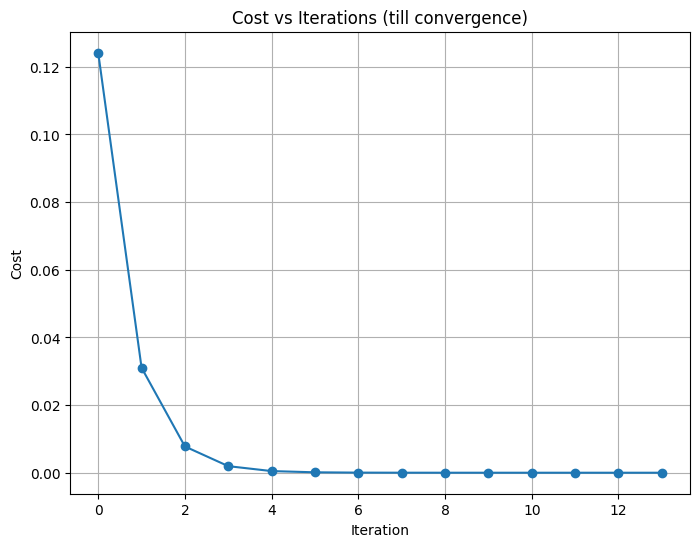

In [25]:
# Plot cost vs iteration (first 50 iterations)
plt.figure(figsize=(8,6))
plt.plot(range(len(costs)), costs, marker='o')
plt.title("Cost vs Iterations (till convergence)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


###4. Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

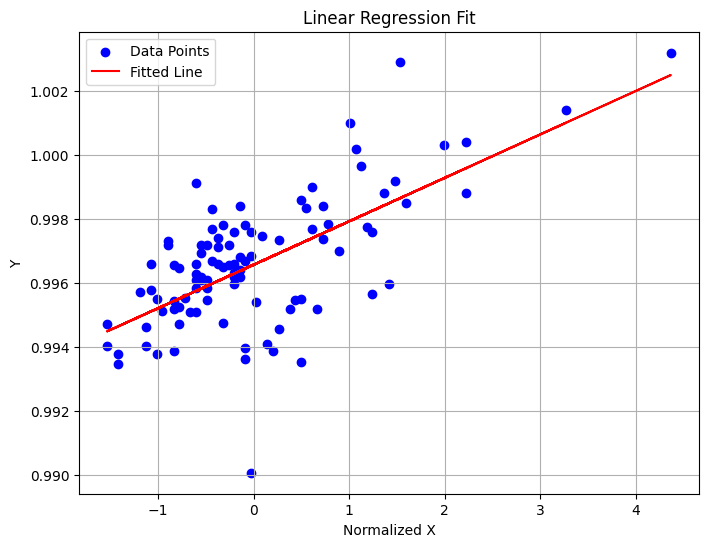

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_norm, Y, color='blue', label="Data Points")
plt.plot(X_norm, theta0 + theta1 * X_norm, color='red', label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("Normalized X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


###5. Test your regression model with the learning rates lr = 0.005, lr = 0.5, lr = 5 For each learning rate, plot a graph showing how the cost function changes for the first 50 iterations and write your observation.

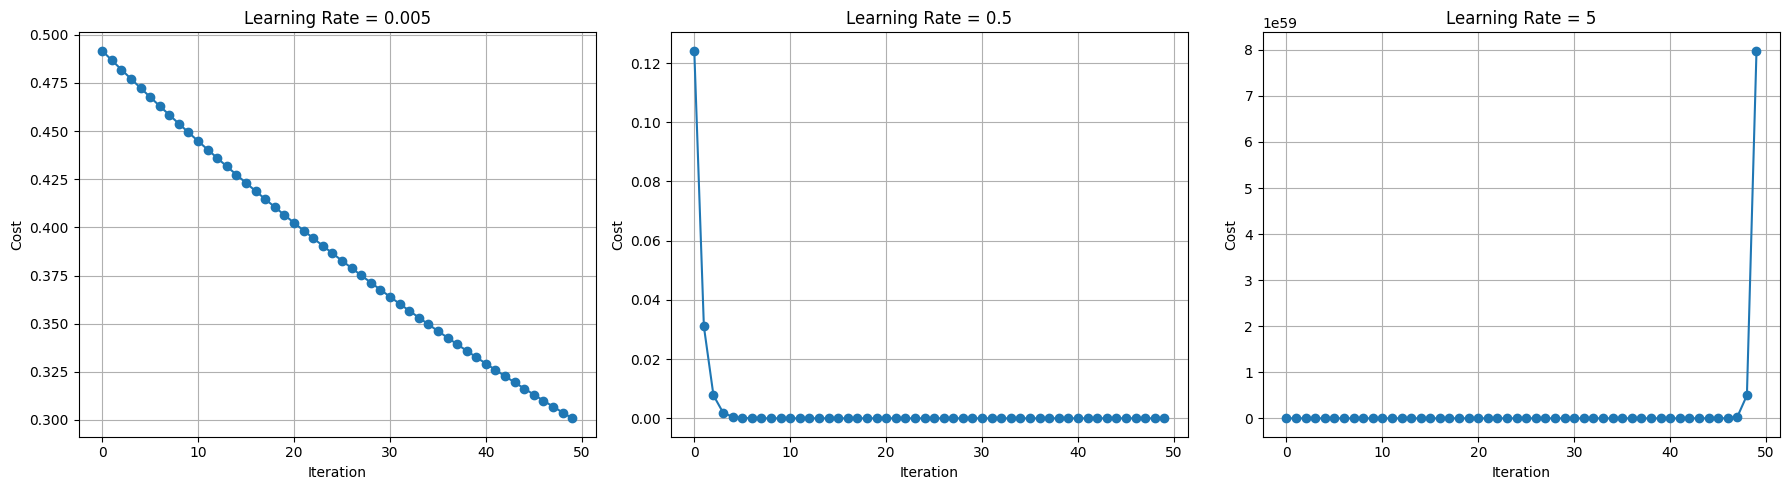

In [27]:
learning_rates = [0.005, 0.5, 5]

plt.figure(figsize=(18,5))

for idx, lr in enumerate(learning_rates):
    theta0 = 0
    theta1 = 0
    costs_lr = []

    for it in range(50):
        predictions = theta0 + theta1 * X_norm
        errors = predictions - Y

        d_theta0 = (1/m) * np.sum(errors)
        d_theta1 = (1/m) * np.sum(errors * X_norm)

        theta0 = theta0 - lr * d_theta0
        theta1 = theta1 - lr * d_theta1

        cost = (1/(2*m)) * np.sum((theta0 + theta1 * X_norm - Y) ** 2)
        costs_lr.append(cost)

    plt.subplot(1,3,idx+1)
    plt.plot(range(50), costs_lr, marker='o')
    plt.title(f"Learning Rate = {lr}")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.grid(True)

plt.tight_layout()
plt.show()


###6. Choose a suitable learning rate, then implement stochastic and min-batch gradient descent, plot the cost function against iteration, and observe how your cost function changes compared to batch gradient descent.

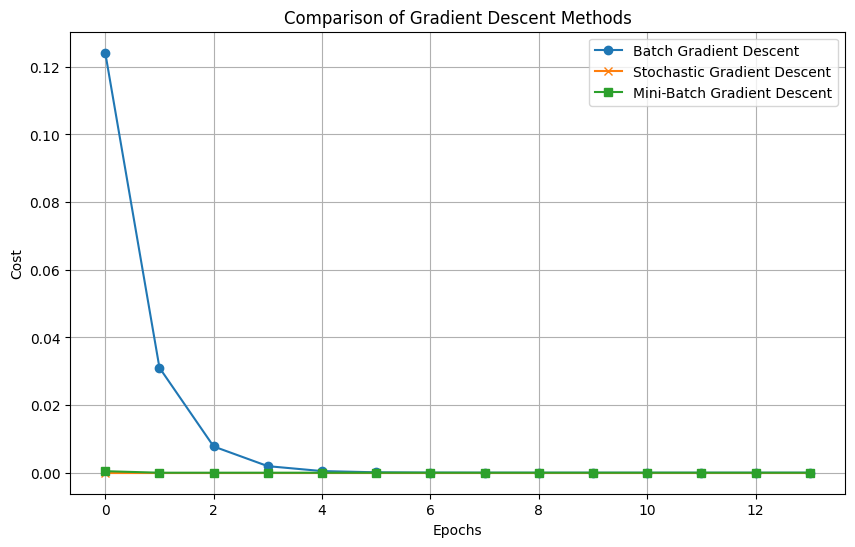

In [28]:
min_len = min(len(cost_batch), len(cost_sgd), len(cost_minibatch))

plt.figure(figsize=(10,6))
plt.plot(range(min_len), cost_batch[:min_len], label="Batch Gradient Descent", marker='o')
plt.plot(range(min_len), cost_sgd[:min_len], label="Stochastic Gradient Descent", marker='x')
plt.plot(range(min_len), cost_minibatch[:min_len], label="Mini-Batch Gradient Descent", marker='s')

plt.title("Comparison of Gradient Descent Methods")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()
